# ASSIGNMENT-5:

#### Using this dataset, predict lung cancer using K-Nearest Neighbors, Naives Bayes, Random Forest, Decision Tree, ANN. Comment on your analysis.

## Step-A: Data Pre-processing:

#### Step-1: Import required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Step-2: Import the data:

In [2]:
dataset=pd.read_csv('lung_cancer_prediction.csv')

In [3]:
dataset

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,20,2,5,1
2,Camela,Anderson,30,0,5,2,0
3,Alex,Telles,28,0,8,1,0
4,Diego,Maradona,68,4,5,6,1
5,Cristiano,Ronaldo,34,0,10,0,0
6,Mihail,Tal,58,15,10,0,0
7,Kathy,Bates,22,12,5,2,0
8,Nicole,Kidman,45,2,6,0,0
9,Ray,Milland,52,18,4,5,1


In [4]:
dataset.head()

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,20,2,5,1
2,Camela,Anderson,30,0,5,2,0
3,Alex,Telles,28,0,8,1,0
4,Diego,Maradona,68,4,5,6,1


#### Step-3: Split the data into X and Y

In [5]:
X=dataset.iloc[:,2:-1].values
Y=dataset.iloc[:,-1].values

In [6]:
X

array([[35,  3,  5,  4],
       [27, 20,  2,  5],
       [30,  0,  5,  2],
       [28,  0,  8,  1],
       [68,  4,  5,  6],
       [34,  0, 10,  0],
       [58, 15, 10,  0],
       [22, 12,  5,  2],
       [45,  2,  6,  0],
       [52, 18,  4,  5],
       [33,  4,  8,  0],
       [18, 10,  6,  3],
       [25,  2,  5,  1],
       [28, 20,  2,  8],
       [34, 25,  4,  8],
       [39, 18,  8,  1],
       [42, 22,  3,  5],
       [19, 12,  8,  0],
       [62,  5,  4,  3],
       [73, 10,  7,  6],
       [55, 15,  1,  3],
       [33,  8,  8,  1],
       [22, 20,  6,  2],
       [44,  5,  8,  1],
       [77,  3,  2,  6],
       [21, 20,  5,  3],
       [37, 15,  6,  2],
       [34, 12,  8,  0],
       [55, 20,  1,  4],
       [40, 20,  2,  7],
       [36, 13,  5,  2],
       [56, 20,  3,  3],
       [47, 15,  1,  8],
       [62, 25,  3,  4],
       [26, 10,  7,  2],
       [25, 20,  8,  2],
       [59, 20,  3,  4],
       [62, 15,  5,  5],
       [33, 25,  8,  2],
       [37, 10,  5,  3],


In [7]:
Y

array([1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0])

In [8]:
dataset.describe()

,Age,Smokes,AreaQ,Alkhol,Result
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,42.627119,15.067797,5.203390,3.237288,0.474576
std,16.235230,7.984607,2.461984,2.380517,0.503640
min,18.000000,0.000000,1.000000,0.000000,0.000000
25%,29.000000,10.000000,3.000000,1.000000,0.000000
50%,39.000000,15.000000,5.000000,3.000000,0.000000
75%,55.000000,20.000000,7.500000,5.000000,1.000000
max,77.000000,34.000000,10.000000,8.000000,1.000000


In [9]:
dataset['Result'].value_counts()

Result
0    31
1    28
Name: count, dtype: int64

In [10]:
dataset.isnull().sum()

Name       0
Surname    0
Age        0
Smokes     0
AreaQ      0
Alkhol     0
Result     0
dtype: int64

## Step-B: Building the classification model:

#### step-1: Split data into training and testing

In [11]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2)

#### Step-2: Building Classifiers

#### i)K Nearest Neighbours(KNN)

In [12]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors=7)
#### Training the KNN classifier
KNN.fit(xtrain,ytrain)
## testing the KNN Classifier
Ypred_KNN=KNN.predict(xtest)

In [13]:
## Some metric to test the classifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [14]:
print("KNN Metrics for the model")
print("*************************")
print("Confusion Matrix:{}".format(confusion_matrix(ytest,Ypred_KNN)))
print("Accuracy Score:{}".format(accuracy_score(ytest,Ypred_KNN)))
print("Precision Score:{}".format(precision_score(ytest,Ypred_KNN)))
print("Recall Score:{}".format(recall_score(ytest,Ypred_KNN)))
print("F1 Score:{}".format(f1_score(ytest,Ypred_KNN)))

KNN Metrics for the model
*************************
Confusion Matrix:[[4 1]
 [0 7]]
Accuracy Score:0.9166666666666666
Precision Score:0.875
Recall Score:1.0
F1 Score:0.9333333333333333


#### ii)Naive Bayes Algorithm

In [15]:
from sklearn.naive_bayes import GaussianNB
NB=GaussianNB()
### Training the NB classifier
NB.fit(xtrain,ytrain)
### testing the NB classifier
Ypred_NB=NB.predict(xtest)

In [16]:
print("Naive Bayes Metrics for the model")
print("*********************************")
print("Confusion Matrix:{}".format(confusion_matrix(ytest,Ypred_NB)))
print("Accuracy Score:{}".format(accuracy_score(ytest,Ypred_NB)))
print("Precision Score:{}".format(precision_score(ytest,Ypred_NB)))
print("Recall Score:{}".format(recall_score(ytest,Ypred_NB)))
print("F1 Score:{}".format(f1_score(ytest,Ypred_NB)))

Naive Bayes Metrics for the model
*********************************
Confusion Matrix:[[5 0]
 [0 7]]
Accuracy Score:1.0
Precision Score:1.0
Recall Score:1.0
F1 Score:1.0


#### iii) Decision Tree

In [17]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier(criterion='entropy',max_depth=4)
### Training the DT classifier
DT.fit(xtrain,ytrain)
### testing the DT classifier
Ypred_DT=DT.predict(xtest)

In [18]:
print("Decision Tree Metrics for the model")
print("***********************************")
print("Confusion Matrix:{}".format(confusion_matrix(ytest,Ypred_DT)))
print("Accuracy Score:{}".format(accuracy_score(ytest,Ypred_DT)))
print("Precision Score:{}".format(precision_score(ytest,Ypred_DT)))
print("Recall Score:{}".format(recall_score(ytest,Ypred_DT)))
print("F1 Score:{}".format(f1_score(ytest,Ypred_DT)))

Decision Tree Metrics for the model
***********************************
Confusion Matrix:[[5 0]
 [0 7]]
Accuracy Score:1.0
Precision Score:1.0
Recall Score:1.0
F1 Score:1.0


#### iv) Random Forest Tree classifier

In [19]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=50,criterion='entropy')
### Training the RFT classifier
rf.fit(xtrain,ytrain)
### testing the RFT classifier
Ypred_rf=rf.predict(xtest)

In [20]:
print("Random Forest Tree Metrics for the model")
print("****************************************")
print("Confusion Matrix:{}".format(confusion_matrix(ytest,Ypred_rf)))
print("Accuracy Score:{}".format(accuracy_score(ytest,Ypred_rf)))
print("Precision Score:{}".format(precision_score(ytest,Ypred_rf)))
print("Recall Score:{}".format(recall_score(ytest,Ypred_rf)))
print("F1 Score:{}".format(f1_score(ytest,Ypred_rf)))

Random Forest Tree Metrics for the model
****************************************
Confusion Matrix:[[5 0]
 [0 7]]
Accuracy Score:1.0
Precision Score:1.0
Recall Score:1.0
F1 Score:1.0


#### v) ANN :

In [21]:
#### Import libraries:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import Adam

In [37]:
model=Sequential()
model.add(Dense(512,activation='relu',input_shape=(xtrain.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer=Adam(),metrics=['accuracy'])

C:\Users\ASUS\anaconda3\envs\DLL\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
from keras.callbacks import EarlyStopping
es=EarlyStopping(monitor='val_accuracy',mode='max',patience=10)

In [39]:
ANN_clf=model.fit(xtrain,ytrain,epochs=50,callbacks=[es],validation_split=0.2)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 344ms/step - accuracy: 0.6019 - loss: 1.1884 - val_accuracy: 0.3000 - val_loss: 2.2302
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.4806 - loss: 1.4254 - val_accuracy: 0.9000 - val_loss: 0.5177
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.5735 - loss: 0.8075 - val_accuracy: 0.8000 - val_loss: 0.3808
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5374 - loss: 1.0753 - val_accuracy: 0.3000 - val_loss: 0.9562
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.6151 - loss: 0.6820 - val_accuracy: 0.3000 - val_loss: 1.3287
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.5943 - loss: 0.9165 - val_accuracy: 0.5000 - val_loss: 0.5701
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.5555 - loss: 0.7481 - val_accuracy: 1.0000 - val_loss: 0.2110
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.4986 - loss: 0.9555 - val_accuracy: 1.0000 - val_loss: 0.2117

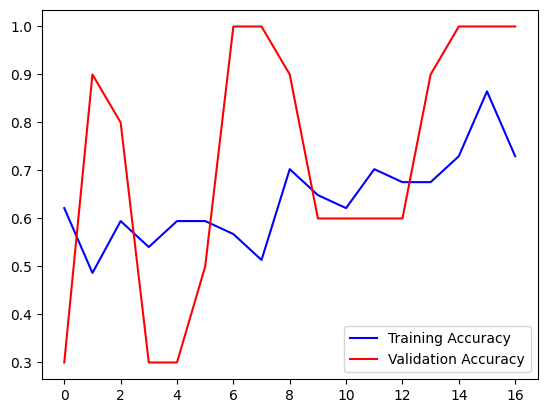

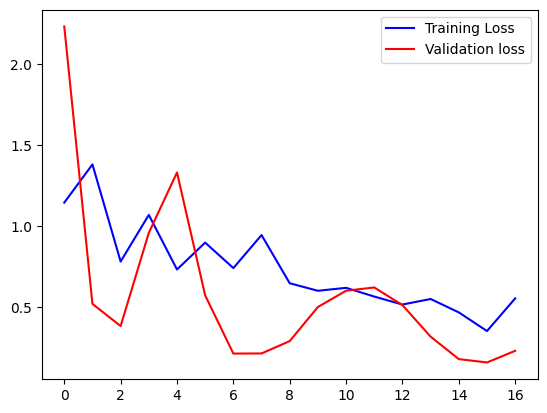

In [40]:
acc=ANN_clf.history['accuracy']
val_acc=ANN_clf.history['val_accuracy']
loss=ANN_clf.history['loss']
val_loss=ANN_clf.history['val_loss']
epochs=range(len(acc))

# accuracy test
plt.plot(epochs,acc,'blue',label='Training Accuracy')
plt.plot(epochs,val_acc,'red',label='Validation Accuracy')
plt.legend()
plt.show()

# loss plot
plt.plot(epochs,loss,'blue',label='Training Loss')
plt.plot(epochs,val_loss,'red',label='Validation loss')
plt.legend()
plt.show()

In [41]:
ypred=model.predict(xtest)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


In [42]:
y_pred_labels=(ypred>0.5).astype(int)

In [43]:
from sklearn.metrics import accuracy_score,classification_report
print("Test accuracy:",accuracy_score(ytest,y_pred_labels))
print(classification_report(ytest,y_pred_labels))

Test accuracy: 0.9166666666666666
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.88      1.00      0.93         7

    accuracy                           0.92        12
   macro avg       0.94      0.90      0.91        12
weighted avg       0.93      0.92      0.91        12



## All the models performed nearly accurate except KNN 